### Set up

In [1]:
import os
import glob
import shutil
import random
import itertools
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

### Data Preperation

In [2]:
path = os.getcwd()+'/data/dogsvscats' #used to get current directory
os.chdir(path)
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    

    for c in random.sample(glob.glob('train/cat*'),500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('train/dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('train/cat*'),100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('train/dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('train/cat*'),50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('train/dog*'),50):
        shutil.move(c,'test/dog')

In [4]:
train_path = path + '/train'
valid_path = path + '/valid'
test_path = path + '/test'

### Data Processing

Shuffle is false for test set because we want to look at unshuffled labels

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat', 'dog'],shuffle=False, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
assert train_batches.n == 1000
assert test_batches.n == 100
assert valid_batches.n == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes

In [9]:
# plots images with labels within jupyter notebook
def plotImages(images,labels):
    fig, axes = plt.subplots(2,5,figsize=(20,10))
    axes = axes.flatten()
    for img, ax, label in zip(images,axes,labels):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [10]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

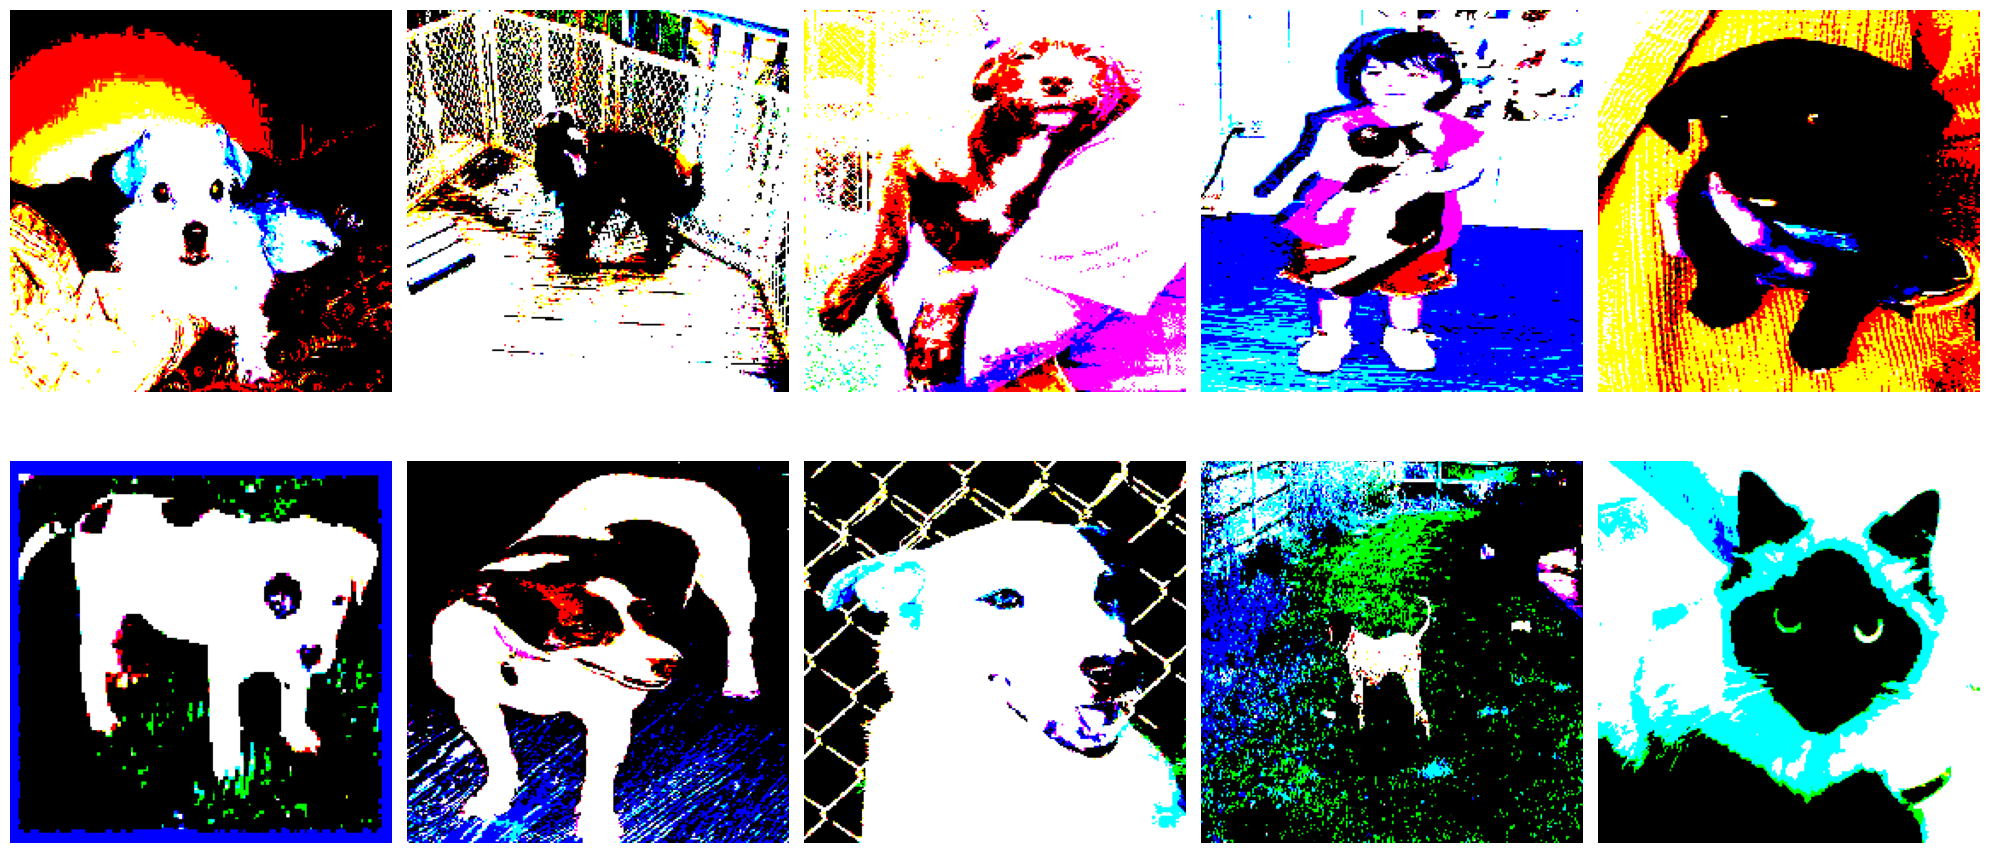

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [11]:
plotImages(imgs,labels)
print(labels)

### Build and train CNN

Padding same means the dimensionality of our images doesnt reduces after applying convolution

In [12]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding= 'same',  input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2),strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding= 'same',),
        MaxPool2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [13]:
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

Since we have only two output labels its possible to use binary cross entropy but we have in turn change output nodes to one and use sigmoid as output function 

In [14]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

We are specfying X but not that is because whenever data is stored as generator,generator the itself contains labels

In [15]:
model.fit(x=train_batches, validation_data=valid_batches,
           epochs=10, verbose=2)

Epoch 1/10
100/100 - 36s - loss: 17.6038 - accuracy: 0.5710 - val_loss: 4.4259 - val_accuracy: 0.5400 - 36s/epoch - 357ms/step
Epoch 2/10
100/100 - 28s - loss: 1.4806 - accuracy: 0.7900 - val_loss: 3.6524 - val_accuracy: 0.5650 - 28s/epoch - 284ms/step
Epoch 3/10
100/100 - 30s - loss: 0.3030 - accuracy: 0.9230 - val_loss: 2.9448 - val_accuracy: 0.5800 - 30s/epoch - 300ms/step
Epoch 4/10
100/100 - 35s - loss: 0.1508 - accuracy: 0.9620 - val_loss: 3.0018 - val_accuracy: 0.5550 - 35s/epoch - 348ms/step
Epoch 5/10
100/100 - 34s - loss: 0.0725 - accuracy: 0.9780 - val_loss: 3.4669 - val_accuracy: 0.5950 - 34s/epoch - 341ms/step
Epoch 6/10
100/100 - 32s - loss: 0.0208 - accuracy: 0.9950 - val_loss: 3.2060 - val_accuracy: 0.5300 - 32s/epoch - 319ms/step
Epoch 7/10
100/100 - 30s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.0164 - val_accuracy: 0.5850 - 30s/epoch - 300ms/step
Epoch 8/10
100/100 - 35s - loss: 5.2404e-04 - accuracy: 1.0000 - val_loss: 2.9562 - val_accuracy: 0.5700 - 35s/epoch 

### Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

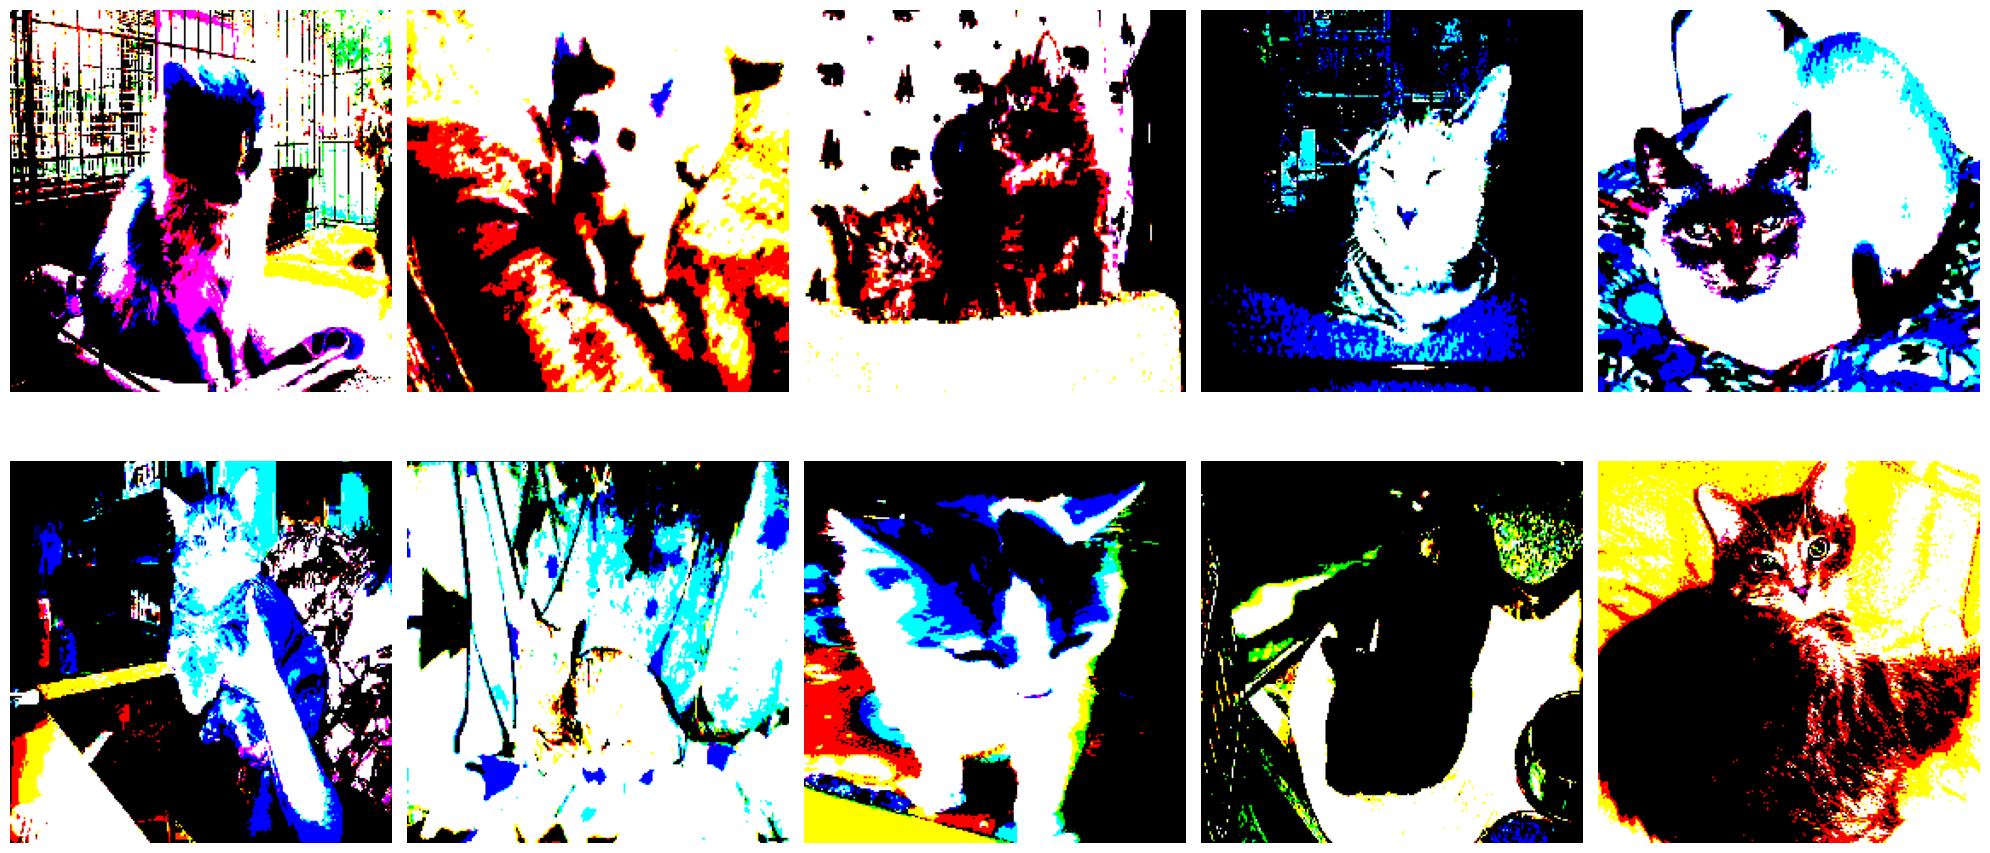

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs, test_labels)
print(test_labels)

In [18]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
predictions = model.predict(x=test_batches, verbose=0)

In [20]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [21]:
cm =confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [22]:
cm

array([[35, 15],
       [16, 34]], dtype=int64)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[35 15]
 [19 31]]


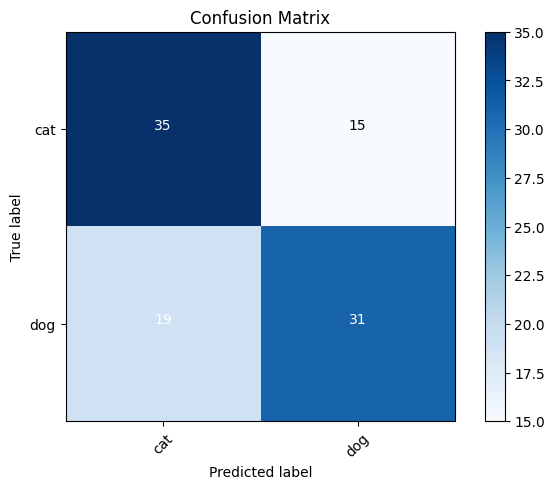

In [21]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

VGG Preprocessing
 - Subtracting the mean RBG value computed on training set,from each pixel

In [38]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

0.0 138357544


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [40]:
for layer in model.layers:
    layer.trainable = False

In [41]:
model.add(Dense(2, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [43]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 4097000

134260544 4097000


#### Train the fine-tuned VGG16 model

In [44]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x=train_batches, validation_data=valid_batches,
          epochs=5, verbose=2)

Epoch 1/5
100/100 - 171s - loss: 0.2070 - accuracy: 0.9160 - val_loss: 0.1191 - val_accuracy: 0.9600 - 171s/epoch - 2s/step
Epoch 2/5
100/100 - 172s - loss: 0.0711 - accuracy: 0.9800 - val_loss: 0.1134 - val_accuracy: 0.9650 - 172s/epoch - 2s/step
Epoch 3/5
100/100 - 174s - loss: 0.0469 - accuracy: 0.9900 - val_loss: 0.1061 - val_accuracy: 0.9650 - 174s/epoch - 2s/step
Epoch 4/5
100/100 - 165s - loss: 0.0343 - accuracy: 0.9930 - val_loss: 0.1078 - val_accuracy: 0.9650 - 165s/epoch - 2s/step
Epoch 5/5
100/100 - 170s - loss: 0.0261 - accuracy: 0.9970 - val_loss: 0.1064 - val_accuracy: 0.9650 - 170s/epoch - 2s/step


#### Predict using fine-tuned VGG16 model

In [46]:
predictions = model.predict(test_batches,verbose=0)

In [47]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred = np.argmax(predictions, axis=-1))

In [49]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

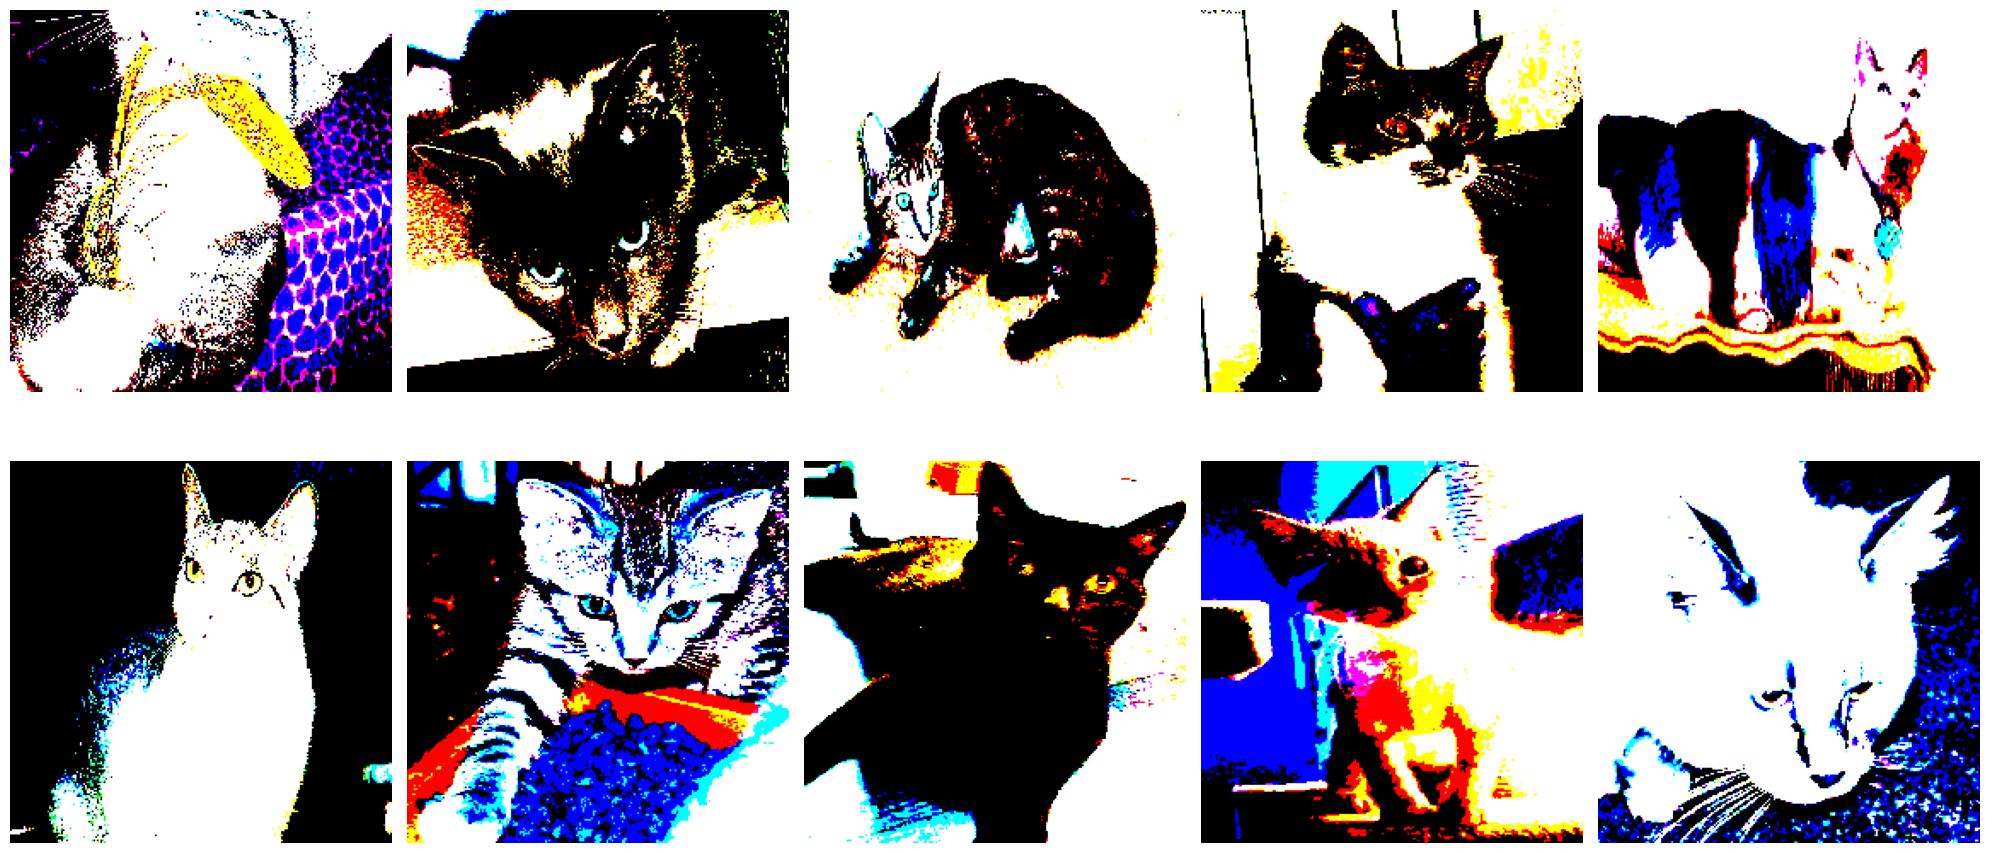

In [50]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs,test_labels)

Confusion matrix, without normalization
[[50  0]
 [ 2 48]]


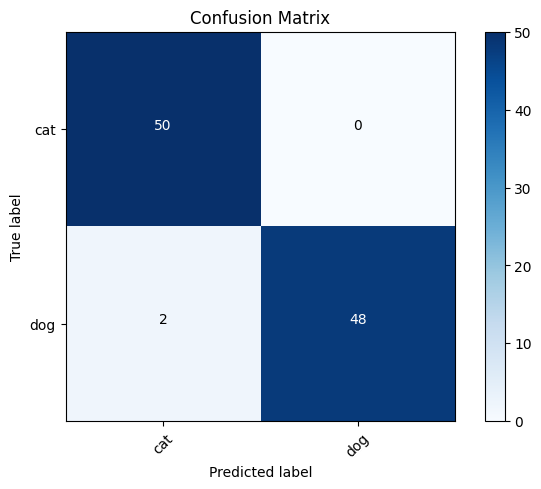

In [51]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')